**Initial Visualization**

1. Modify data for visualization/analysis

2. Use merge to combine the two datasets imported

3. Make some visualizations about dataframes

Import Data

In [1]:
from google.colab import files
import pandas as pd
import json
import io
from io import StringIO
import matplotlib.pyplot as plt

In [2]:
uploaded_json_champ = files.upload()

Saving champion_info.json to champion_info.json


In [3]:
uploaded_json_champ2 = files.upload()

Saving champion_info_2.json to champion_info_2.json


In [4]:
uploaded_json_spell = files.upload()

Saving summoner_spell_info.json to summoner_spell_info.json


In [6]:
df_games = pd.read_csv('/content/games.csv')

In [7]:
df_champ1 = pd.read_json(io.StringIO(uploaded_json_champ.get('champion_info.json').decode('utf-8'))) 

In [8]:
df_champ2 = pd.read_json(io.StringIO(uploaded_json_champ2.get('champion_info_2.json').decode('utf-8')))

In [9]:
df_spell = pd.read_json(io.StringIO(uploaded_json_spell.get('summoner_spell_info.json').decode('utf-8')))

Organize and create new dataframes from old using different functions

Extract 'dictionary' data in a form of column from json file using json_normalize. 

In [10]:
DataChamp = pd.json_normalize(df_champ2["data"])
DataChamp.head()

,tags,title,id,key,name
0,"[Fighter, Tank]",the Darkin Blade,266,Aatrox,Aatrox
1,"[Mage, Assassin]",the Nine-Tailed Fox,103,Ahri,Ahri
2,[Assassin],the Fist of Shadow,84,Akali,Akali
3,"[Tank, Support]",the Minotaur,12,Alistar,Alistar
4,"[Tank, Mage]",the Sad Mummy,32,Amumu,Amumu


Drop unnecessary columns

In [11]:
DataChamp2 = DataChamp.drop(['title', 'key'], axis=1)
DataChamp2.head()

,tags,id,name
0,"[Fighter, Tank]",266,Aatrox
1,"[Mage, Assassin]",103,Ahri
2,[Assassin],84,Akali
3,"[Tank, Support]",12,Alistar
4,"[Tank, Mage]",32,Amumu


Extract certain columns needed for data analysis within games.csv

In [12]:
df_need = df_games[['firstTower','firstBlood','winner','firstRiftHerald','gameDuration',
                    't1_champ1id','t1_champ2id','t1_champ3id','t1_champ4id','t1_champ5id',
                    't2_champ1id','t2_champ2id','t2_champ3id','t2_champ4id','t2_champ5id']]
df_need.head()

,firstTower,firstBlood,winner,firstRiftHerald,gameDuration,t1_champ1id,t1_champ2id,t1_champ3id,t1_champ4id,t1_champ5id,t2_champ1id,t2_champ2id,t2_champ3id,t2_champ4id,t2_champ5id
0,1,2,1,2,1949,8,432,96,11,112,104,498,122,238,412
1,1,1,1,1,1851,119,39,76,10,35,54,25,120,157,92
2,1,2,1,0,1493,18,141,267,68,38,69,412,126,24,22
3,1,1,1,0,1758,57,63,29,61,36,90,19,412,92,22
4,1,2,1,0,2094,19,29,40,119,134,37,59,141,38,51


Preprocess the 4 columns (firstBlood, firstTower, firstRiftHerald, winner) to create bar graphs/ pie charts.


For firstTower

In [13]:
filt_1_Tower = (df_games['firstTower'] == 1)
FirstTower= df_games[filt_1_Tower]

In [14]:
filt_2_Tower = (df_games['firstTower'] == 2)
FirstTower2= df_games[filt_2_Tower]

In [15]:
rows_count = len(FirstTower.index)
rows_count

25861

In [16]:
rows_count2 = len(FirstTower2.index)
rows_count2

24416

In [17]:
TowerTaken = [['Team 1', 25861],['Team 2', 24415]]

In [18]:
df_TowerTaken = pd.DataFrame(TowerTaken, columns=['Team','Towers Taken'])
df_TowerTaken

,Team,Towers Taken
0,Team 1,25861
1,Team 2,24415


Following graphs show the comparison between the number of 
games in which Team 1 and Team 2 has taken the first tower. Team 1 has taken more first towers than team 2. However, we have to investigate the significance of this difference before drawing conclusion.   

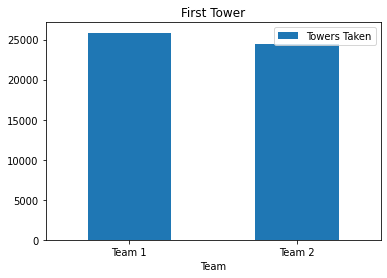

In [19]:
ax = df_TowerTaken.plot.bar(x = 'Team', y='Towers Taken', rot=0)
ax = plt.title("First Tower")

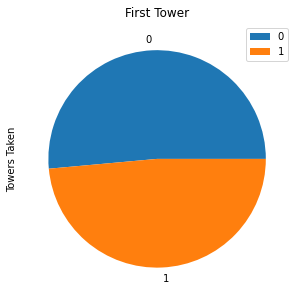

In [72]:
plot = df_TowerTaken.plot.pie(y='Towers Taken', figsize=(5, 5))
ax = plt.title("First Tower")

For firstRiftHerald

In [21]:
filt_1_Rift = (df_games['firstRiftHerald'] == 0)
FirstRift= df_games[filt_1_Rift]

In [22]:
filt_1_Rift = (df_games['firstRiftHerald'] == 1)
FirstRift1= df_games[filt_1_Rift]

In [23]:
filt_2_Rift = (df_games['firstRiftHerald'] == 2)
FirstRift2= df_games[filt_2_Rift]

In [24]:
rows_count = len(FirstRift.index)
rows_count

26179

In [25]:
rows_count = len(FirstRift1.index)
rows_count

12948

In [26]:
rows_count = len(FirstRift2.index)
rows_count

12363

In [27]:
RiftHerald_Taken = [['No team', 26179],['Team 1', 12948],['Team 2', 12363]]

In [28]:
df_RiftTaken = pd.DataFrame(RiftHerald_Taken, columns=['Team','Rift Heralds Taken'])
df_RiftTaken

,Team,Rift Heralds Taken
0,No team,26179
1,Team 1,12948
2,Team 2,12363


Following graphs show the comparison between the number of 
games in which Team 1 and Team 2 took the Rift Herald. Team 1 has taken more Rift Herald than team 2. 

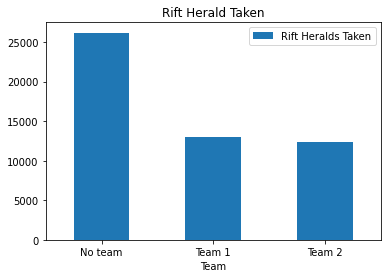

In [73]:
ax = df_RiftTaken.plot.bar(x = 'Team', y='Rift Heralds Taken', rot=0)
ax = plt.title("Rift Herald Taken")

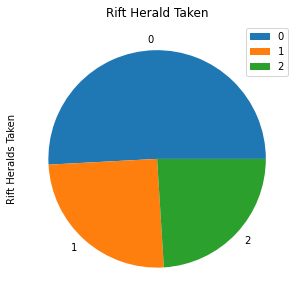

In [74]:
plot = df_RiftTaken.plot.pie(y='Rift Heralds Taken', figsize=(5, 5))
ax = plt.title("Rift Herald Taken")

For firstBlood

In [31]:
filt_1_Blood = (df_games['firstBlood'] == 1)
FirstBlood= df_games[filt_1_Blood]

In [32]:
filt_2_Blood = (df_games['firstBlood'] == 2)
FirstBlood2= df_games[filt_2_Blood]

In [33]:
rows_count = len(FirstBlood.index)
rows_count

26113

In [34]:
rows_count = len(FirstBlood2.index)
rows_count

24822

In [35]:
First_Blood = [['Team 1', 26113],['Team 2', 24822]]

In [36]:
df_FirstBlood = pd.DataFrame(First_Blood, columns=['Team','First Blood'])
df_FirstBlood

,Team,First Blood
0,Team 1,26113
1,Team 2,24822


Following graphs show the comparison between the number of 
games in which Team 1 and Team 2 took first blood. Team 1 has taken more first bloods. However, we have to investigate the significance of this difference before drawing conclusion.  

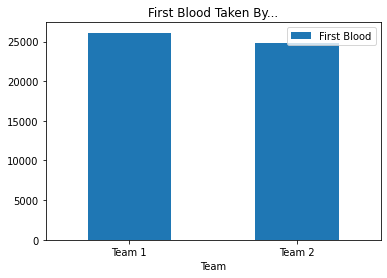

In [75]:
ax = df_FirstBlood.plot.bar(x = 'Team', y='First Blood', rot=0)
ax = plt.title("First Blood Taken By...")

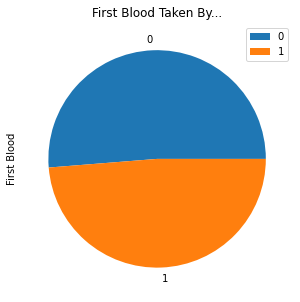

In [77]:
plot = df_FirstBlood.plot.pie(y='First Blood', figsize=(5, 5))
ax = plt.title("First Blood Taken By...")

For winner

In [39]:
filt_1_winner = (df_games['winner'] == 1)
winner1= df_games[filt_1_winner]

In [40]:
filt_2_winner = (df_games['winner'] == 2)
winner2= df_games[filt_2_winner]

In [41]:
rows_count = len(winner1.index)
rows_count

26077

In [42]:
rows_count = len(winner2.index)
rows_count

25413

In [43]:
Winner = [['Team 1', 26077],['Team 2', 25413]]

In [44]:
df_winner = pd.DataFrame(Winner, columns=['Team','Games Won'])
df_winner

,Team,Games Won
0,Team 1,26077
1,Team 2,25413


Following graphs show the comparison between the number of 
games in which Team 1 and Team 2 won. Team 1 won more games than Team 2.

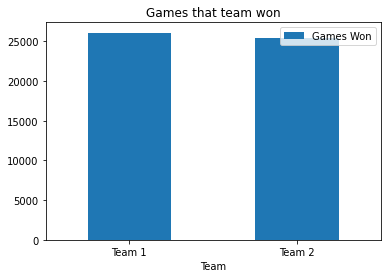

In [78]:
ax = df_winner.plot.bar(x = 'Team', y='Games Won', rot=0)
ax = plt.title("Games that team won")

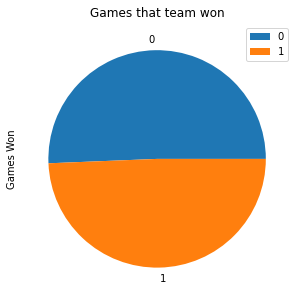

In [79]:
plot = df_winner.plot.pie(y='Games Won', figsize=(5, 5))
ax = plt.title("Games that team won")

Create a new dataframe by merging games.csv with champion_info_2.json, focusing on placing the right champion into the right row

In [47]:
AllNewChampData = df_need.merge(DataChamp2, how='left',left_on='t1_champ1id', right_on='id',suffixes=('_t1Champ1id', '_right'))

In [48]:
AllNewChampData2 = AllNewChampData.merge(DataChamp2, how='left',left_on='t1_champ2id', right_on='id',suffixes=('_t1Champ1id', '_t1Champ2id'))

In [49]:
AllNewChampData3 = AllNewChampData2.merge(DataChamp2, how='left',left_on='t1_champ3id', right_on='id',suffixes=('_t1Champ2id','_t1Champ3id'))

In [50]:
AllNewChampData4 = AllNewChampData3.merge(DataChamp2, how='left',left_on='t1_champ4id', right_on='id',suffixes=('_t1Champ3id', '_t1Champ4id'))

In [51]:
AllNewChampData5 = AllNewChampData4.merge(DataChamp2, how='left',left_on='t1_champ5id', right_on='id',suffixes=('_t1Champ4id', '_t3Champ5id'))

In [52]:
AllNewChampData6 = AllNewChampData5.merge(DataChamp2, how='left',left_on='t2_champ1id', right_on='id',suffixes=('_t1Champ5id', '_t2Champ1id'))

In [53]:
AllNewChampData7 = AllNewChampData6.merge(DataChamp2, how='left',left_on='t2_champ2id', right_on='id',suffixes=('_t2Champ1id', '_t2Champ2id'))

In [54]:
AllNewChampData8 = AllNewChampData7.merge(DataChamp2, how='left',left_on='t2_champ3id', right_on='id',suffixes=('_t2Champ2id', '_t2Champ3id'))

In [55]:
AllNewChampData9 = AllNewChampData8.merge(DataChamp2, how='left',left_on='t2_champ4id', right_on='id',suffixes=('_t2Champ3id', '_t3Champ4id'))

In [56]:
AllNewChampData_Final = AllNewChampData9.merge(DataChamp2, how='left',left_on='t2_champ5id', right_on='id',suffixes=('_t2Champ4id', '_t2Champ5id'))

In [80]:
AllNewChampData_Final.head()

,firstTower,firstBlood,winner,firstRiftHerald,gameDuration,t1_champ1id,t1_champ2id,t1_champ3id,t1_champ4id,t1_champ5id,...,name_t2Champ2id,tags_t2Champ3id,id_t2Champ3id,name_t2Champ3id,tags_t2Champ4id,id_t2Champ4id,name_t2Champ4id,tags_t2Champ5id,id_t2Champ5id,name_t2Champ5id
0,1,2,1,2,1949,8,432,96,11,112,...,Xayah,"[Fighter, Tank]",122,Darius,"[Assassin, Fighter]",238,Zed,"[Support, Fighter]",412,Thresh
1,1,1,1,1,1851,119,39,76,10,35,...,Morgana,"[Fighter, Tank]",120,Hecarim,"[Fighter, Assassin]",157,Yasuo,"[Fighter, Assassin]",92,Riven
2,1,2,1,0,1493,18,141,267,68,38,...,Thresh,"[Fighter, Marksman]",126,Jayce,"[Fighter, Assassin]",24,Jax,"[Marksman, Support]",22,Ashe
3,1,1,1,0,1758,57,63,29,61,36,...,Warwick,"[Support, Fighter]",412,Thresh,"[Fighter, Assassin]",92,Riven,"[Marksman, Support]",22,Ashe
4,1,2,1,0,2094,19,29,40,119,134,...,Jarvan IV,"[Fighter, Assassin]",141,Kayn,"[Assassin, Mage]",38,Kassadin,[Marksman],51,Caitlyn


Check if the merge happened correctly

In [58]:
AllNewChampData_Final.isnull().values.any()

False

In [59]:
rows_count = len(AllNewChampData_Final.index)
rows_count

51490

In [60]:
rows_count = len(df_games.index)
rows_count

51490

Download the modified data for future usage

In [62]:
AllNewChampData_Final.to_csv('ChampDataMerged.csv')
files.download('ChampDataMerged.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>